In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt

# plt.style.use("seaborn")


In [32]:
df = pd.read_csv("EURUSD_CLOSE.csv", parse_dates=[0], index_col=0)
df.rename(columns={ "Close":"price"},inplace=True)
# df.drop(columns=["Return"],inplace=True,axis=1)
df["Return"] = np.log(df.price.div(df.price.shift(1)))

In [33]:
df

,price,Return
Date,,
2003-12-01,1.196501,NaN
2003-12-02,1.208897,0.010307
2003-12-03,1.212298,0.002809
2003-12-04,1.208094,-0.003473
2003-12-05,1.218695,0.008736
...,...,...
2024-10-28,1.079657,-0.002551
2024-10-29,1.081677,0.001870
2024-10-30,1.082064,0.000357


In [34]:
# df.plot(figsize=(16,8),title="eurusd")

In [59]:
df.Return.rolling(5).mean().to_frame()

,Return
Date,
2003-12-01,NaN
2003-12-02,NaN
2003-12-03,NaN
2003-12-04,NaN
2003-12-05,NaN
...,...
2024-10-28,-0.001330
2024-10-29,-0.000019
2024-10-30,0.000432


In [75]:
df["position"] = -np.sign(df.Return.rolling(2).mean())

In [76]:
df.head()

,price,Return,position,strategy
Date,,,,
2003-12-04,1.208094,-0.003473,NaN,-0.003473
2003-12-05,1.218695,0.008736,-1.0,-0.008736
2003-12-08,1.222001,0.002709,-1.0,0.002709
2003-12-09,1.224995,0.002447,-1.0,0.002447
2003-12-10,1.219096,-0.004827,1.0,-0.004827


<Axes: title={'center': 'Price and Position in 2008'}, xlabel='Date'>

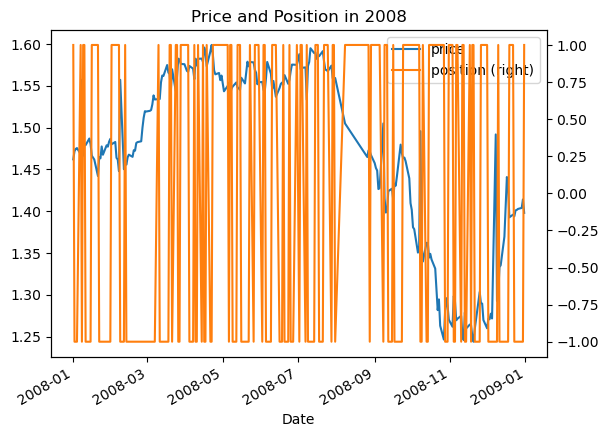

In [77]:
df.loc["2008", ["price", "position"]].plot(secondary_y="position", title="Price and Position in 2008")


In [78]:
df["strategy"] = df.position.shift(1) * df.Return

In [79]:
df.dropna(inplace=True)

In [81]:
df[["strategy","Return"]].sum()
df[["strategy","Return"]].sum().apply(np.exp)

strategy    3.677253
Return      0.891708
dtype: float64

In [82]:
df["creturn"] = df["Return"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

<Axes: xlabel='Date'>

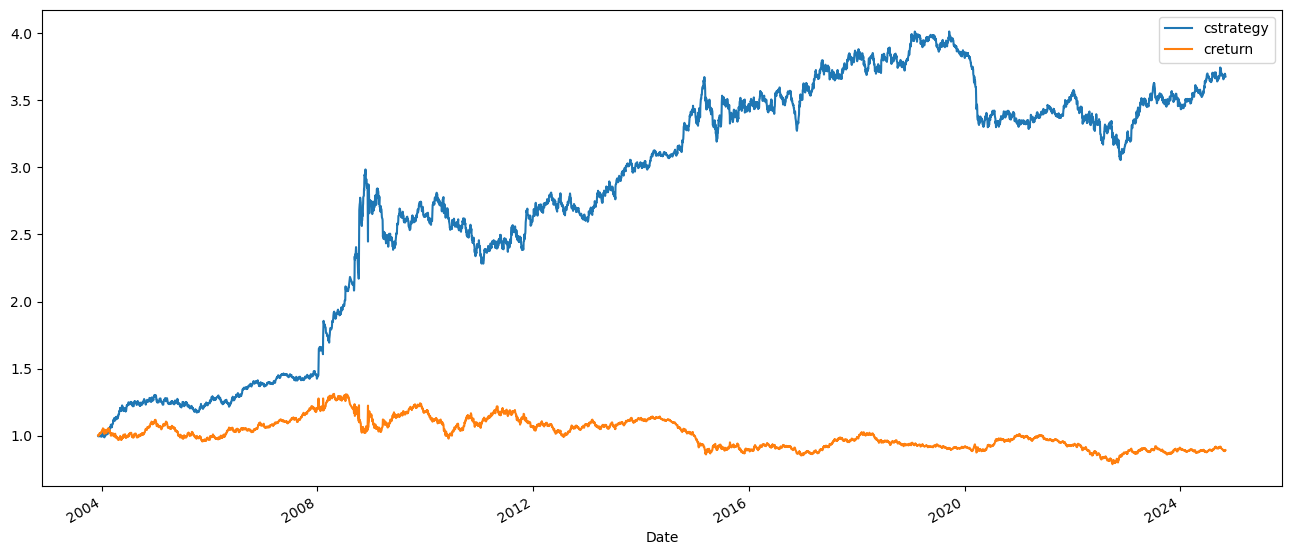

In [87]:
df[["cstrategy","creturn"]].plot(figsize=(16,7))